In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/home/prem/Data Analytics with Python/data/chemical_variable.csv")
data

,Hydrocarbon level(x),Purity(y)
0,0.99,90.01
1,1.02,89.05
2,1.15,91.43
3,1.29,93.74
4,1.46,96.73
5,1.36,94.45
6,0.87,87.59
7,1.23,91.77
8,1.55,99.42
9,1.40,93.65


In [3]:
x = data['Hydrocarbon level(x)']

In [4]:
data.columns

Index(['Hydrocarbon level(x)', ' Purity(y)'], dtype='object')

In [5]:
y = data[' Purity(y)']

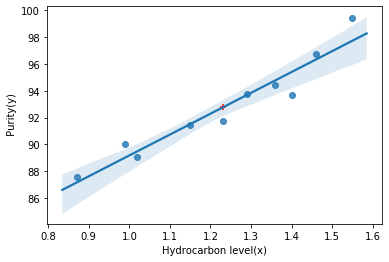

In [6]:
plt.figure()
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color='red',marker='+')

##### Auto Sales Problem

In [7]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats

In [8]:
tbl = pd.read_csv("/home/prem/Data Analytics with Python/data/auto_sales.csv")

In [9]:
tbl.head()

,No of TV ads (x),No of car sold (y)
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


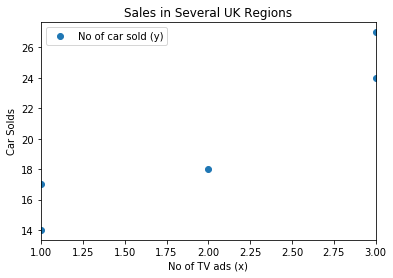

In [10]:
tbl.plot("No of TV ads (x)","No of car sold (y)",style="o")
plt.ylabel("Car Solds")
plt.title("Sales in Several UK Regions")
plt.show()

In [11]:
t = tbl['No of TV ads (x)']
c = tbl['No of car sold (y)']

In [12]:
import statsmodels.api as s

In [13]:
t = s.add_constant(t)

/home/prem/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
model1 = s.OLS(c,t) # Remember it is in capital letter
result1 = model1.fit()

In [15]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:     No of car sold (y)   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Wed, 12 Aug 2020   Prob (F-statistic):             0.0190
Time:                        15:45:04   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.0000      2.366  

/home/prem/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


### Hardness and Tensile Strength Problem:
<b>Problem:</b> The data in the csv file provide measurements on the hardness and tensile strength for 35 specimens of die-cast aluminium. It is believed that hardness (measured in Rockwell E units) can be used to predict tensile strength (measured in thousands of pounds per square inch) <br><br>
a) construct a scatter plot<br>
b) Assuming a linear relationship, use the least-square method to find the regression coefficient b0 and b1.<br>
c) Interpret the meaning of the slope, b1, in this problem.<br>
d) Predict the mean tensile strength for die-cast aluminium that has a hardness of 30 Rockwell E units.<br>

In [17]:
data = pd.read_csv("/home/prem/Data Analytics with Python/data/tensile_strength_hardness.csv")
data.head()

,Tensile strength,Hardness
0,53.0,29.31
1,70.2,34.86
2,84.3,36.82
3,55.3,30.12
4,78.5,34.02


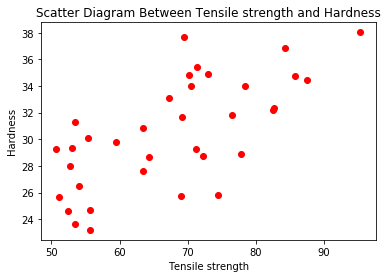

In [22]:
plt.scatter(x = data['Tensile strength'],y = data['Hardness'],c='red')
plt.title("Scatter Diagram Between Tensile strength and Hardness")
plt.xlabel("Tensile strength")
plt.ylabel("Hardness")
plt.show()

In [25]:
x = data['Hardness']
y = data['Tensile strength']

In [27]:
t = s.add_constant(x)

In [28]:
model = s.OLS(y,t)
result = model.fit()

In [29]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Tensile strength   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     28.71
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           6.41e-06
Time:                        16:50:38   Log-Likelihood:                -125.65
No. Observations:                  35   AIC:                             255.3
Df Residuals:                      33   BIC:                             258.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7107     11.659      0.490      0.6

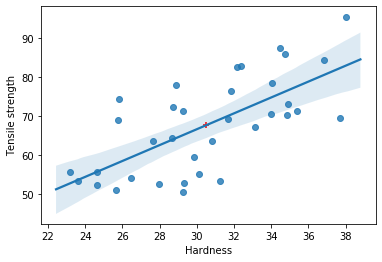

In [31]:
plt.figure()
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color='red',marker='+')
plt.show()

In [32]:
x = data['Hardness'].values.reshape(-1,1)
y = data['Tensile strength'].values.reshape(-1,1)

In [33]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
reg.intercept_[0],reg.coef_[0][0]

(5.710656213520338, 2.0302772618964013)

In [35]:
reg.predict([[30]])

array([[66.61897407]])

### Ice-cream Vendors Problem
<b>Problem:</b> Data were collected from a sample of 10 ice-cream vendors located near college campuses.<br>
For the i<sup>th</sup> observation or restaurant in the sample, x<sub>i</sub>, is the size of the student population (in thousands) and y<sub>i</sub> is the quarterly sales (in thousands of dollars).
The values of x<sub>i</sub> and y<sub>i</sub> for the 10 restaurants in the sample are summarized in Table (csv file).

In [37]:
data = pd.read_csv("/home/prem/Data Analytics with Python/data/student_restaurant_icecream_sales.csv")
data.head()

,Restaurant,student_population,sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117


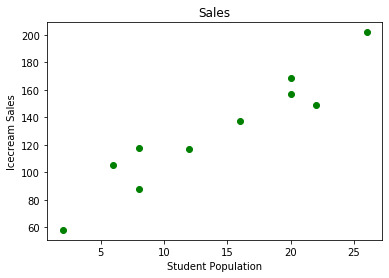

In [40]:
plt.scatter(data['student_population'],data['sales'],c='green')
plt.xlabel('Student Population')
plt.ylabel('Icecream Sales')
plt.title('Sales')
plt.show()

#### Statistical Regression Model

In [41]:
st_pop = data['student_population']
sales = data['sales']

In [44]:
x = s.add_constant(st_pop)

In [46]:
model = s.OLS(sales,x)
result = model.fit()

In [55]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           2.55e-05
Time:                        17:40:16   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

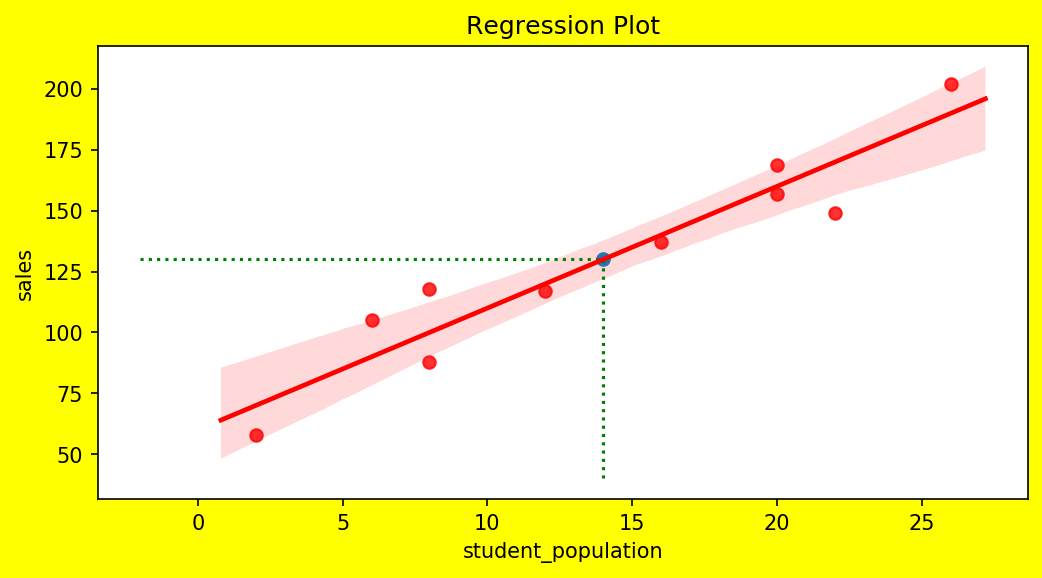

In [75]:
plt.figure(figsize=(8,4),facecolor='yellow',dpi=150)
sns.regplot(x='student_population',y='sales',data=data,fit_reg = True,color= 'red')
plt.scatter(np.mean(data['student_population']),np.mean(data['sales']),marker='o')
plt.vlines(x = np.mean(data['student_population']),ymin=40,ymax=np.mean(data['sales']),colors='green',linestyle='dotted')
plt.hlines(y = np.mean(data['sales']),xmin=-2,xmax=np.mean(data['student_population']),colors='green',linestyle='dotted')
plt.xlabel('student_population')
plt.ylabel('sales')
plt.title('Regression Plot')
plt.show()

In [102]:
x = data['student_population'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

In [77]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
reg.coef_[0][0],reg.intercept_[0]

(5.0, 60.0)

In the Ice-Cream vendor example, the estimated regression equation provides an estimate of the relationship between the size of the student population x and quarterly sales y <br>
<b> Equation: y' = 60 + 5x</b> 

In [88]:
#if student population is 21 thousands i.e. x = 21
print("Estimated Ice-Cream sales will be: {}".format(reg.predict([[21]])[0][0]))

Estimated Ice-Cream sales will be: 165.0


### Prediction Interval

In [89]:
from statsmodels.stats.outliers_influence import summary_table

In [96]:
st,data1,ss2 = summary_table(result,alpha=0.05)
fittedvalues = data1[:,2]
predict_mean_se = data1[:,3]
predict_mean_ci_low,predict_mean_ci_upp = data1[:,4:6].T
predict_ci_low,predict_ci_upp = data1[:,6:8].T

#####  Plotting

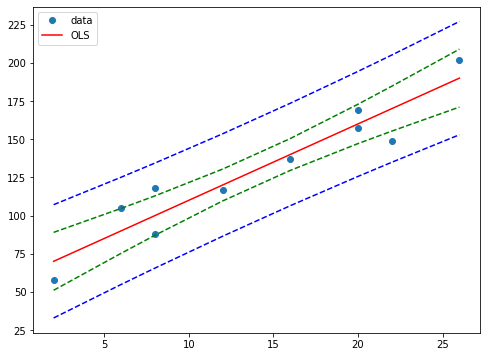

In [108]:
X = s.add_constant(x)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x,y,'o',label = 'data')
ax.plot(x,fittedvalues,'r-',label = 'OLS')
ax.plot(x,predict_ci_low,'b--')
ax.plot(x,predict_ci_upp,'b--')
ax.plot(x,predict_mean_ci_low,'g--')
ax.plot(x,predict_mean_ci_upp,'g--')
ax.legend(loc = 'best')
plt.show()

#### OLS and Anova

In [110]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [111]:
reg1 = ols(formula = "sales~student_population",data = data)
fit1 = reg1.fit()

In [112]:
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           2.55e-05
Time:                        18:44:52   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

/home/prem/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [113]:
print(anova_lm(fit1))

                     df   sum_sq   mean_sq          F    PR(>F)
student_population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


In [114]:
influence = fit1.get_influence()
resid_student = influence.resid_studentized_external

resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

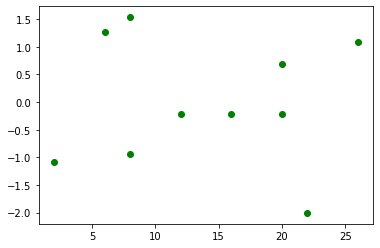

In [116]:
plt.figure()
plt.scatter(data['student_population'],resid_student,color= "green")
plt.show()

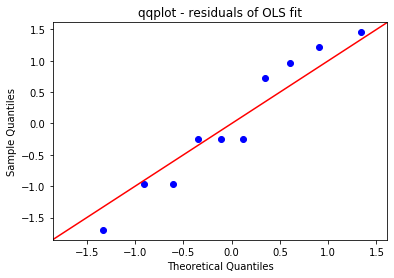

In [121]:
resid = fit1.resid
probplot = s.ProbPlot(resid,stats.norm,fit = True)
fig = probplot.qqplot(line='45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()